# Logistic Regression and US Election Data

Date: October 17, 2020

Name: Stephen Brock

## Table of Contents

1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
2. [Data Engineering for Modelling](#Data-Engineering-for-Modelling)
3. [Prediction](#Prediction)
    - [3.1)](#2.1) Fit a separate logistic regression model for each year in the data of the form Pr(democract=1)=α+β×income. Does the effect of income change over time?
    - [3.2)](#3.2) Fit a logistic regression predicting support for democrats given all these inputs. Consider how to include these as regression predictors and also consider possible interactions.
    - [3.3)](#3.3) Evaluate and compare the different models fitted. Plot the ROC for various models and make comparisons using the AUC.
    - [3.4)](#3.4) For the best model, interpret the coefficients, both on the logistic scale and as odds ratios.

2. [Conclusion](#Conclusion)

## Data
[Back to top](#Logistic-Regression-and-US-Election-Data)

The data used contains the survey data of presidential preference and income for all years from 1948 to 2002 along with other variables including sex, ethnicity, education, party identification, and political ideology.

1. Fit a separate logistic regression model for each year in the data of the form Pr(democract=1)=α+β×income. Does the effect of income change over time?

2. Fit a logistic regression predicting support for democrats given all these inputs. Consider how to include these as regression predictors and also consider possible interactions.

3. Evaluate and compare the different models you have fit. Plot the ROC for various models and make comparisons using the AUC.

4. For your chosen model, interpret the coefficients, both on the logistic scale and as odds ratios.

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('nes_data.csv')

Let us start by looking into the data.

In [3]:
raw_data.head()

,year,age,gender,race,educ1,income_num,income,occup1,union,religion,marital_status,father_party,mother_party,vote,presvote,presvote_2party
0,1948,NaN,1. male,1. white,1. grade school of less (0-8 grades),3.0,3. 34 to 67 percentile,NaN,"1. yes, someone (1948: head) in househol",1. protestant,NaN,NaN,NaN,"2. yes, voted",1. democrat,1. democrat
1,1948,NaN,2. female,1. white,"2. high school (12 grades or fewer, incl",5.0,5. 96 to 100 percentile,NaN,"2. no, no one in the household belongs t",1. protestant,NaN,NaN,NaN,"2. yes, voted",2. republican,2. republican
2,1948,NaN,2. female,1. white,"2. high school (12 grades or fewer, incl",4.0,4. 68 to 95 percentile,NaN,"2. no, no one in the household belongs t",2. catholic (roman catholic),NaN,NaN,NaN,"2. yes, voted",1. democrat,1. democrat
3,1948,NaN,2. female,1. white,"3. some college(13 grades or more,but no",5.0,5. 96 to 100 percentile,NaN,"2. no, no one in the household belongs t",1. protestant,NaN,NaN,NaN,"2. yes, voted",2. republican,2. republican
4,1948,NaN,1. male,1. white,"3. some college(13 grades or more,but no",4.0,4. 68 to 95 percentile,NaN,"2. no, no one in the household belongs t",2. catholic (roman catholic),NaN,NaN,NaN,"2. yes, voted",1. democrat,1. democrat


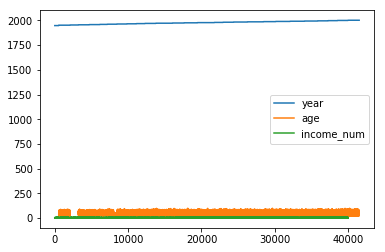

In [4]:
raw_data.plot()

In [5]:
raw_data.describe()

,year,age,income_num
count,41498.000000,39532.000000,37020.000000
mean,1977.682973,46.139836,2.934684
std,14.717680,16.996458,1.148548
min,1948.000000,17.000000,1.000000
25%,1966.000000,32.000000,2.000000
50%,1978.000000,44.000000,3.000000
75%,1990.000000,59.000000,4.000000
max,2002.000000,99.000000,5.000000


In [6]:
raw_data.isnull().sum(axis=0)

year                   0
age                 1966
gender               103
race                 313
educ1                439
income_num          4478
income              4478
occup1              7080
union               1702
religion             445
marital_status      2187
father_party       27205
mother_party       27786
vote                3410
presvote           25959
presvote_2party    26258
dtype: int64

In [7]:
raw_data.shape

(41498, 16)

Lots of NaN values

In [8]:
inc_n, inc_n_count = np.unique(raw_data['income_num'], return_counts=True)

(array([ 5881.,     0.,  5941.,     0.,     0., 12034.,     0., 11043.,
            0.,  2121.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

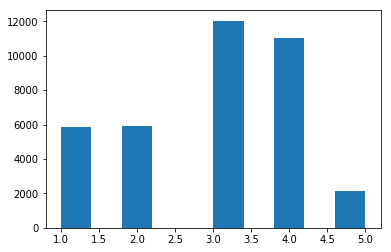

In [9]:
income_data = raw_data['income_num'].values
income_data = income_data[~np.isnan(income_data)]
plt.hist(income_data)

### Investigate the distribution of each parameter

See the distribution of unique values in each column

16


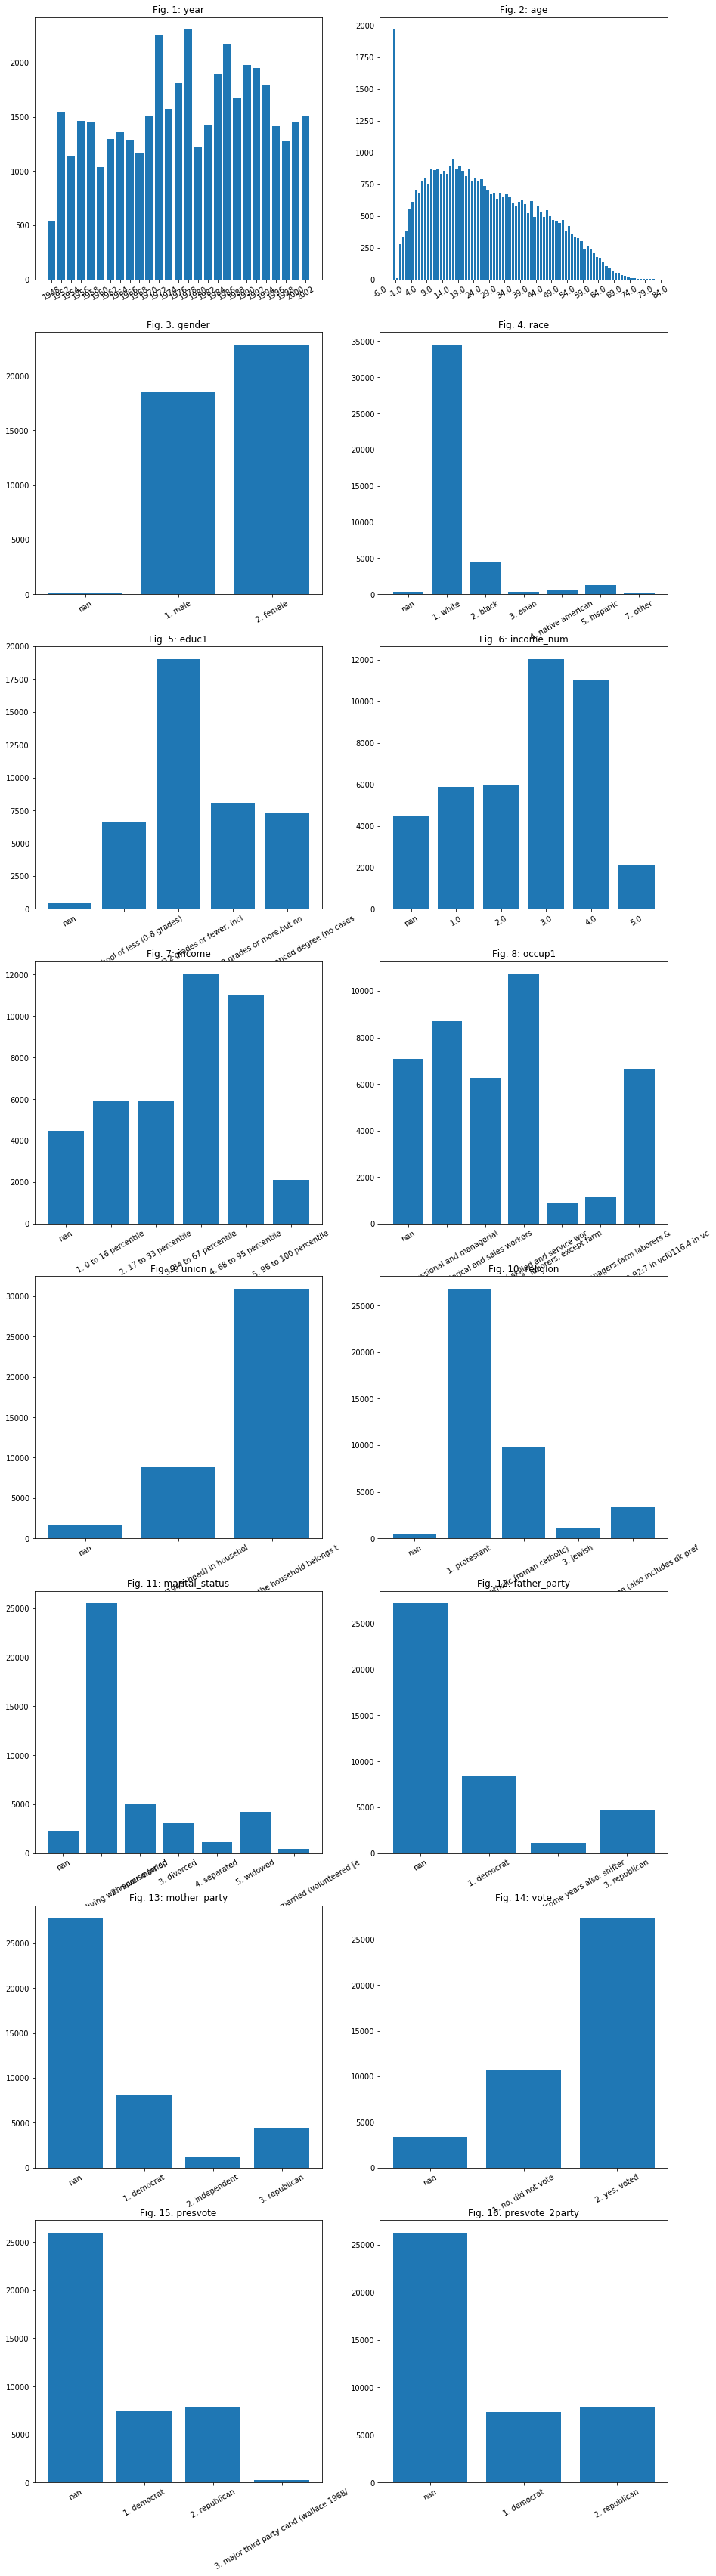

In [10]:
import matplotlib.ticker as ticker
raw_data.columns
print(len(raw_data.columns)) # 2 by 8 graph setup
fig, axs2 = plt.subplots(8, 2, figsize=(15,60))

for k, col in enumerate(raw_data.columns):
    x, y = np.unique(raw_data[col].values.astype(str), return_counts=True)

    i = k//2
    j = k%2
    axs2[i,j].bar(x, y)
    axs2[i,j].title.set_text('Fig. ' + str(k+1) + ': ' +col)
    axs2[i,j].set_xticklabels(x, Rotation=30)
    if col == 'age':
        plt.sca(axs2[i, j])
#         plt.xticks(ticks=[a for a in x if a%3==0],[str(a) if a%3 ==0 else "" for a in x ])
        start, end = axs2[i,j].get_xlim()
        plt.xticks(np.arange(start,end,5), np.arange(np.floor(start),np.floor(end),5))



### Comments

**Year**
<br>
Year data looks balanced except for 1948, where there are only 500 data points.

**Age**
<br>
Age data looks strange as there are a bunch of people under the age of 19. There appears to also be a lot of people who are 0 years old or maybe they are missing. This should be investigated further.

**Gender**
<br>
It appears that there are more female voters than male voters; however the data is almost 50/50 split.

**Race**
<br>
The majority of voters are white voters. It would be interesting to see how this changes over time.

**Education**
<br>
The majority of voters graduated high school. It would be interesting to see how this changes over time.

**Income number**
<br>
The majority of voters are income numbers 3 and 4, which are "33 to 67 percentile" and "68 to 95 percentile". This makes sense as 33 to 95 is over 60% of the data. It would be interesting to check what percentile of the data is in each of the income number buckets.

**Occupation**
<br>
Occupations seem balanced for the most part, except the 3rd and 2nd last ones which are "laborers (except farm)" and "farm laborers". The counts for those are 909 and 1162 respectively.

**Union**
<br>
8843 belong to a union and 30953 do not. This is unbalanced but both answers have enough data.

**Religion**
<br>
Religion is very unbalanced. Protestant is the overwhelmingly most common religion.

**Marital status**
<br>
Balanced aside from the first category, "married and living with spouse". 

**Father and Mother party**
<br>
These features are fairly sparse, with the majority being missing. Due to the sparsity, I will likely not use these features in the model.

**Vote**
<br>
Of the data collected, the majority voted, but there are still a significant number of non-voters. 

**Presvote**
<br>
The majority of prevotes are missing, this should be investigated.

**Presvote 2nd party**
<br>
Many votes here are also missing.


### To-do:
The initial analysis leads to further investigation below:
1. It would be interesting to see how these distributions change over time.
2. How did the amount of non-voters change over the years?
3. Investigate the distribution of income numbers to see how well the labels fit
4. Investigate presidential votes, what are the characteristics of the missing votes?
5. Investigate the age feature distribution



### 1. How does the distribution of age change over time

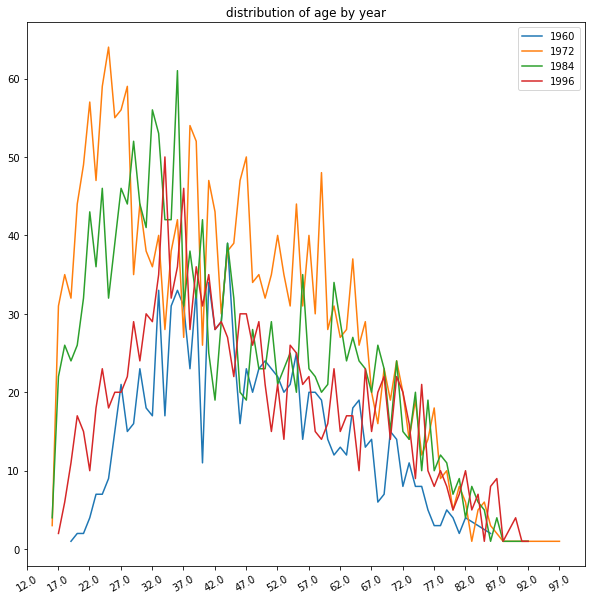

In [11]:
# start with one distribution and extrapolate with for-loop
# need to use a line graph instead of a bar graph

# select only election years
non_election_years = [1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002]  # from analysis below
# election_years = [d for d in raw_data.year.unique() if d not in non_election_years]
# print(election_years)
election_years = [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000]

spec_years = [1960, 1972, 1984, 1996]

fig, axs3 = plt.subplots(1, 1, figsize=(10,10))

for year in spec_years:
    x, y = np.unique(raw_data[raw_data.year == year]['age'].values.astype(str), return_counts=True)   
    x = np.array(x[:-1], dtype=np.float32)
    y = y[:-1]
    axs3.plot(x,y, label=str(year))
    axs3.set_xticklabels(x, Rotation=30)
#     if col == 'age':
    plt.sca(axs3)
#         plt.xticks(ticks=[a for a in x if a%3==0],[str(a) if a%3 ==0 else "" for a in x ])
    start, end = axs3.get_xlim()
    plt.xticks(np.arange(start,end,5), np.arange(np.floor(start),np.floor(end),5))
    plt.title('distribution of age by year')
plt.legend()


All the distributions are similar in that they are right skewed.

### 2. How did the amount of non-voters change over the years?

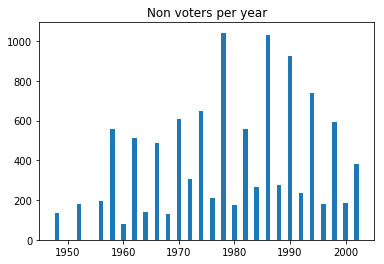

In [12]:
# raw_data.vote.unique()
non_voters_data = raw_data[['year','vote']][raw_data['vote'] == '1. no, did not vote']
nv_data = non_voters_data.groupby('year').count().reset_index(drop=False)

plt.bar(nv_data.year, nv_data.vote)
plt.title('Non voters per year')
plt.show()


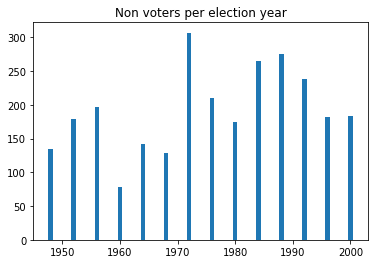

In [13]:
# only election years
nv_data = non_voters_data.groupby('year').count().reset_index(drop=False)
nv_data = nv_data[nv_data.year.isin(election_years)]
plt.bar(nv_data.year, nv_data.vote)
plt.title('Non voters per election year')
plt.show()

### Notes:
Max number of non-voters in an election year is 300.




### 3. Investigate the distribution of income numbers to see how well the labels fit

In [14]:
inc_lab, inc_cnt = np.unique(raw_data['income'].astype(str).values, return_counts=True)
total = sum(inc_cnt)
inc_res_df = pd.DataFrame({'income': inc_lab, 'proportion':inc_cnt/total, 'theoretical': [0.16, 0.16, 0.33, 0.95-0.68, 0.04, 0]})
inc_res_df

,income,proportion,theoretical
0,1. 0 to 16 percentile,0.141718,0.16
1,2. 17 to 33 percentile,0.143164,0.16
2,3. 34 to 67 percentile,0.289990,0.33
3,4. 68 to 95 percentile,0.266109,0.27
4,5. 96 to 100 percentile,0.051111,0.04
5,nan,0.107909,0.00


These proportions are close enough.

### 4. Investigate presidential votes, what are the characteristics of the missing votes?

/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-

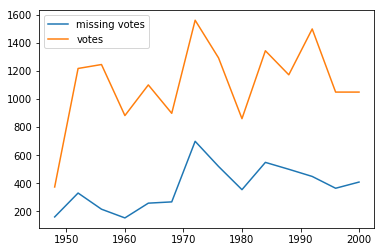

In [15]:
# let's see the missing votes based on presidential year
missing_votes = raw_data[['year','presvote']][raw_data['presvote'].isnull()]
missing_votes['presvote'] = missing_votes.presvote.isnull()
mv_data = missing_votes.groupby('year').count().reset_index(drop=False)
mv_data = mv_data[mv_data.year.isin(election_years)]
plt.figure(0)
plt.plot(mv_data.year, mv_data.presvote, label="missing votes")
# plt.title('NaN (missing) votes vs year')
# plt.show()


votes = raw_data[['year','presvote']].dropna()
votes = votes.groupby('year').count().reset_index(drop=False)
votes = votes[votes.year.isin(election_years)]
plt.figure(0)
plt.plot(votes.year, votes.presvote, label="votes")
# plt.title('votes vs year')
plt.legend()
plt.show()

#### Notes:
- Always more votes than missing votes per year.
- The missing votes (NaN votes) must be associated with non-election years.

In [16]:
# if there was anyone who said they did not vote, but they actually did vote
raw_data[raw_data.presvote.notnull() & raw_data.year.isin(election_years) & (raw_data.vote == '1. no, did not vote')][['year','presvote','vote']]

,year,presvote,vote


### 5. Investigate the age distribution.

In [17]:
# how many voters are underage?
# voted and age < 18

underage = raw_data[(raw_data.age < 18) & (raw_data.vote == '2. yes, voted') & (raw_data.year.isin(election_years))]
print(underage.shape)
underage.head()

(4, 16)


,year,age,gender,race,educ1,income_num,income,occup1,union,religion,marital_status,father_party,mother_party,vote,presvote,presvote_2party
14432,1972,17.0,2. female,1. white,"3. some college(13 grades or more,but no",4.0,4. 68 to 95 percentile,NaN,"2. no, no one in the household belongs t",2. catholic (roman catholic),2. never married,1. democrat,1. democrat,"2. yes, voted",1. democrat,1. democrat
24928,1984,17.0,2. female,1. white,"2. high school (12 grades or fewer, incl",NaN,NaN,"3. skilled, semi-skilled and service wor","1. yes, someone (1948: head) in househol",2. catholic (roman catholic),2. never married,NaN,NaN,"2. yes, voted",2. republican,2. republican
25008,1984,17.0,1. male,1. white,"2. high school (12 grades or fewer, incl",3.0,3. 34 to 67 percentile,NaN,"1. yes, someone (1948: head) in househol",1. protestant,2. never married,NaN,NaN,"2. yes, voted",2. republican,2. republican
29376,1988,17.0,1. male,1. white,"2. high school (12 grades or fewer, incl",NaN,NaN,NaN,"2. no, no one in the household belongs t",1. protestant,2. never married,NaN,NaN,"2. yes, voted",2. republican,2. republican


These 4 people are recorded underage voters. Is there a special condition that allowed them to vote?

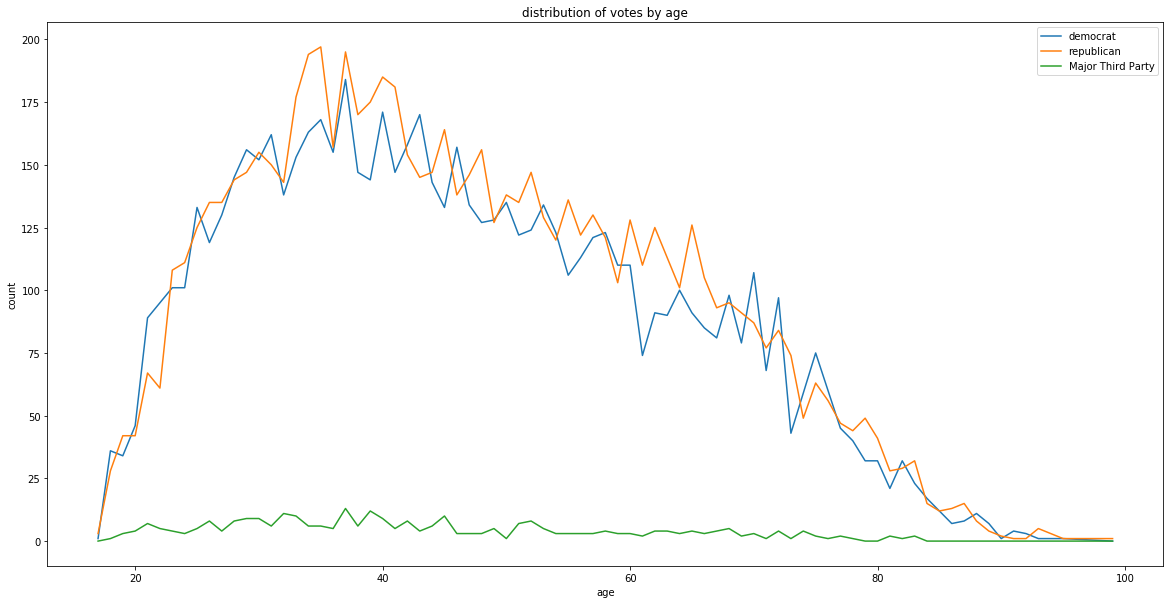

In [18]:
# investigate the how different ages voted
# were democrat voters older or younger in general?

presvotes1 = raw_data[['age','presvote']].dropna()
presvotes2 = presvotes1.groupby(['age', 'presvote']).size().reset_index(drop=False).rename(columns={0:"count"})

a = presvotes2[presvotes2['presvote'] == '1. democrat']
b = presvotes2[presvotes2['presvote'] == '2. republican']

# need to rederive this to account for years with 0
a = b.merge(a,how='left', on='age')[['age', 'presvote_y', 'count_y']].fillna(0)
a.columns = ['age', 'presvote', 'count']
a['presvote'] = ['1. democrat']*a.shape[0]
# print(a.head())

c = presvotes2[presvotes2['presvote'] == '3. major third party cand (wallace 1968/']
c = b.merge(c, how='left', on='age')[['age', 'presvote_y', 'count_y']].fillna(0)
c.columns = ['age', 'presvote', 'count']
c['presvote'] = ['3. major third party cand (wallace 1968/']*c.shape[0]
# print(c.head())

# presvotes2.head()
x = b.age.values
y = a['count'].values
z = b['count'].values
k = c['count'].values

plt.figure(figsize=(20,10))
plt.plot(x,y, label='democrat')
plt.plot(x,z, label='republican')
plt.plot(x,k, label='Major Third Party')
plt.xlabel('age')
plt.ylabel('count')
plt.title('distribution of votes by age')

plt.legend()
plt.show()




We see that the distribution of votes, by age, are very similar for both democrat and republicans.

In [19]:
raw_data.presvote.unique()

array(['1. democrat', '2. republican', nan,
       '3. major third party cand (wallace 1968/'], dtype=object)

In [20]:
np.unique(raw_data['marital_status'].astype(str).values, return_counts=True)

(array(['1. married and living with spouse (or sp', '2. never married',
        '3. divorced', '4. separated', '5. widowed',
        '7. partners/ not married (volunteered [e', 'nan'], dtype=object),
 array([25527,  4970,  3055,  1094,  4206,   459,  2187]))

### Data Engineering for Modelling

In order to create a predictive model, we will need to engineer new features (e.g. indicator variables) that make more sense than the distributions of labels given. Why is this important? Engineering new features, representative of the given data, is important because the logistic regression model does not understand string categories. Instead of string categories, we can use Yes/No (1/0) indicator variables, which can be understood by the logistic regression model.

Below, I print out the distribution of each feature in the given data set to identify which variables need to be converted to indicator variables.

In [21]:
# print everything
pd.set_option("display.max_rows", None, "display.max_columns", None)

for name in raw_data.columns:
    c_vals, val_cnts = np.unique(raw_data[name].values.astype(str), return_counts=True)
    temp_df = pd.DataFrame({name: c_vals, 'count':val_cnts})
    print(temp_df)

    year  count
0   1948    535
1   1952   1548
2   1954   1139
3   1956   1461
4   1958   1450
5   1960   1036
6   1962   1297
7   1964   1359
8   1966   1291
9   1968   1166
10  1970   1507
11  1972   2259
12  1974   1575
13  1976   1812
14  1978   2304
15  1980   1215
16  1982   1418
17  1984   1892
18  1986   2176
19  1988   1672
20  1990   1980
21  1992   1947
22  1994   1795
23  1996   1414
24  1998   1281
25  2000   1458
26  2002   1511
     age  count
0   17.0     13
1   18.0    275
2   19.0    336
3   20.0    379
4   21.0    557
5   22.0    614
6   23.0    709
7   24.0    681
8   25.0    780
9   26.0    798
10  27.0    754
11  28.0    872
12  29.0    862
13  30.0    870
14  31.0    829
15  32.0    856
16  33.0    831
17  34.0    896
18  35.0    951
19  36.0    866
20  37.0    896
21  38.0    852
22  39.0    814
23  40.0    866
24  41.0    777
25  42.0    799
26  43.0    774
27  44.0    789
28  45.0    736
29  46.0    700
30  47.0    671
31  48.0    682
32  49.0    636
33  50.0

#### Data fixes

Below is a list of changes that need to be made to the data in order to account for categorical variables. If the category is ordinal (has a logical order), then we do not need to introduce multiple indicator variables.

1. gender -> is_female
    1. "1. male" to 0
    2. "2. female" to 1
    3. "nan" to NaN
2. race -> needs to be feature variables
    1. "1. white" -> is_white
    2. "2. black" -> is_black
    3. "3. asian" -> is_asian
    4. "4. native american" -> is_native_american
    5. "5. hispanic" -> is_hispanic
    6. "7. other" -> is_other, this can be when all others are 0
    7. nan -> nan for all races
3. age NaN -> NaN
4. educ1 -> ordinal variable, make factor variable if not predictive
    1. scale of 1 to 4, NaN -> NaN
5. income_num (ordinal)
    1. leave as is, see if NaN's should be removed
6. income 
    1. analogous to income_num, gives the description
    2. only need to use income_num
7. occup1
    1. "1. professional and managerial" -> prof_manage
    2. "2. clerical and sales workes" -> cler_sales
    3. "3. skilled, semi-skilled and service wor" -> skill_service
    4. "4. laborers, except farm" -> labor_no_farm
    5. "5. " -> farm
    6. "6." -> home, could be other
    7. NaN
8. union -> has_union
    1. yes
    2. no
9. religion -> indicators
    1. protestant
    2. catholic
    3. jewish
    4. other
    5. nan
10. marital status
    1. married_live_spouse
    2. never_married
    3. divorced
    4. separated
    5. widowed
    6. partners_not_married
11. father_party - indicator variables
12. mother_party - indicator variables
13. vote - indicator
14. presvote - indicators
15. presvote_2party - indicators
    

In [22]:
# gender
is_female = (raw_data['gender'].values == '2. female').astype(int)

#race
# null values are lost in the mix of these (0 for all, not nan)
is_white = (raw_data['race'].values == '1. white').astype(int)
is_black = (raw_data['race'].values == '2. black').astype(int)
is_asian = (raw_data['race'].values == '3. asian').astype(int)
is_native_american = (raw_data['race'].values == '4. native american').astype(int)
is_hispanic = (raw_data['race'].values == '5. hispanic').astype(int)

# age - no changes

# educ1
def educ_to_level(edu):
    edu_dict = {
        '1. grade school of less (0-8 grades)':1,
        '2. high school (12 grades or fewer, incl':2,
        '3. some college(13 grades or more,but no':3, 
        '4. college or advanced degree (no cases':4,
    }
    lkup_edu = edu_dict.get(edu)
    if lkup_edu is None:
        return np.nan
    
    return lkup_edu
    
educ = np.array([educ_to_level(ed) for ed in raw_data['educ1'].values])

# occup1
prof_manage = (raw_data.occup1.values == '1. professional and managerial').astype(int)
cler_sales = (raw_data.occup1.values == '2. clerical and sales workers').astype(int)
skill_service = (raw_data.occup1.values == '3. skilled, semi-skilled and service wor').astype(int)
labor_no_farm = (raw_data.occup1.values == '4. laborers, except farm').astype(int)
farm = (raw_data.occup1.values == '5. farmers,farm managers,farm laborers &').astype(int)
home = (raw_data.occup1.values == '6. homemkrs(1972-92:7 in vcf0116,4 in vc').astype(int)

# union
has_union = (raw_data.union.values == '1. yes, someone (1948: head) in househol').astype(int)

# religion
protestant = (raw_data.religion.values == '1. protestant').astype(int)
rom_catholic = (raw_data.religion.values == '2. catholic (roman catholic)').astype(int)
other_religion = (raw_data.religion.values == '4. other and none (also includes dk pref').astype(int)
jewish = (raw_data.religion.values == '3. jewish').astype(int)

# marital status - other is partners not married
married_liv_spouse = (raw_data.marital_status.values == '1. married and living with spouse (or sp').astype(int)
never_married = (raw_data.marital_status.values == '2. never married').astype(int)
divorced = (raw_data.marital_status.values == '3. divorced').astype(int)
separated = (raw_data.marital_status.values == '4. separated').astype(int)
widowed = (raw_data.marital_status.values == '5. widowed').astype(int)

# father party
father_rep = (raw_data.father_party.values == '3. republican').astype(int)
father_ind = (raw_data.father_party.values == '2. independent (some years also: shifter').astype(int)
father_dem = (raw_data.father_party.values == '1. democrat').astype(int)

# mother party
mother_rep = (raw_data.mother_party.values == '3. republican').astype(int)
mother_ind = (raw_data.mother_party.values == '2. independent').astype(int)
mother_dem = (raw_data.mother_party.values == '1. democrat').astype(int)

# vote
voted = (raw_data.vote.values == '2. yes, voted').astype(int)

# presvote
presv_dem = (raw_data.presvote.values == '1. democrat').astype(int)
presv_rep = (raw_data.presvote.values == '2. republican').astype(int)
presv_3 = (raw_data.presvote.values == '3. major third party cand (wallace 1968/').astype(int)

# presvote_2party
presv2_dem = (raw_data.presvote_2party.values == '1. democrat').astype(int)
presv2_rep = (raw_data.presvote_2party.values == '2. republican').astype(int)

In [23]:
data = raw_data.copy()

# race - other is if none are 1
data['is_female'] = is_female
data['is_white'] = is_white
data['is_black'] = is_black
data['is_asian'] = is_asian
data['is_native_american'] = is_native_american
data['is_hispanic'] = is_hispanic

# education and work - home could be in other
data['educ'] = educ

data['prof_manage'] = prof_manage
data['cler_sales'] = cler_sales
data['skill_service'] = skill_service
data['labor_no_farm'] = labor_no_farm
data['farm'] = farm
data['home'] = home

data['has_union'] = has_union

# religion - other religion could be other, does nan mean no religion?
data['protestant'] = protestant
data['rom_catholic'] = rom_catholic
data['other_religion'] = other_religion
data['jewish'] = jewish

# marriage - other is partner not married
data['married_liv_spouse'] = married_liv_spouse
data['never_married'] = never_married
data['divorced'] = divorced
data['separated'] = separated
data['widowed'] = widowed

# parents - could have other being ind
data['father_rep'] = father_rep
data['father_ind'] = father_ind
data['father_dem'] = father_dem
data['mother_rep'] = mother_rep
data['mother_ind'] = mother_ind
data['mother_dem'] = mother_dem

# voting - could have other being 3rd party
data['voted'] = voted
data['presv_dem'] = presv_dem
data['presv_rep'] = presv_rep
data['presv_3'] = presv_3  #third party
data['presv2_dem'] = presv2_dem
data['presv2_rep'] = presv2_rep

new_variables = [
        'is_female','is_white', 'is_black', 'is_asian', 'is_native_american', 'is_hispanic',
       'educ', 'prof_manage', 'cler_sales', 'skill_service', 'labor_no_farm',
       'farm', 'home', 'has_union', 'protestant', 'rom_catholic',
       'other_religion', 'jewish', 'married_liv_spouse', 'never_married',
       'divorced', 'separated', 'widowed', 'father_rep', 'father_ind',
       'father_dem', 'mother_rep', 'mother_ind', 'mother_dem', 'voted',
       'presv_dem', 'presv_rep', 'presv_3', 'presv2_dem', 'presv2_rep'
]

In [24]:
data.columns

Index(['year', 'age', 'gender', 'race', 'educ1', 'income_num', 'income',
       'occup1', 'union', 'religion', 'marital_status', 'father_party',
       'mother_party', 'vote', 'presvote', 'presvote_2party', 'is_female',
       'is_white', 'is_black', 'is_asian', 'is_native_american', 'is_hispanic',
       'educ', 'prof_manage', 'cler_sales', 'skill_service', 'labor_no_farm',
       'farm', 'home', 'has_union', 'protestant', 'rom_catholic',
       'other_religion', 'jewish', 'married_liv_spouse', 'never_married',
       'divorced', 'separated', 'widowed', 'father_rep', 'father_ind',
       'father_dem', 'mother_rep', 'mother_ind', 'mother_dem', 'voted',
       'presv_dem', 'presv_rep', 'presv_3', 'presv2_dem', 'presv2_rep'],
      dtype='object')

In [25]:
raw_data.race.unique()

array(['1. white', '2. black', nan, '7. other', '4. native american',
       '5. hispanic', '3. asian'], dtype=object)

### Questions:
1. Does nan mean no religion?

### 3.1
[Back to top](#Logistic-Regression-and-US-Election-Data)

Fit a separate logistic regression model for each year in the data of the form Pr(democract=1)=α+β×income. Does the effect of income change over time?

In [26]:
years, years_cnt  = np.unique(data['year'].values, return_counts=True)
print(years)
print(years_cnt)

a, b = np.unique(data[data['income_num'].isnull()].year.values, return_counts=True)
print(b/years_cnt)

[1948 1952 1954 1956 1958 1960 1962 1964 1966 1968 1970 1972 1974 1976
 1978 1980 1982 1984 1986 1988 1990 1992 1994 1996 1998 2000 2002]
[ 535 1548 1139 1461 1450 1036 1297 1359 1291 1166 1507 2259 1575 1812
 2304 1215 1418 1892 2176 1672 1980 1947 1795 1414 1281 1458 1511]
[0.01121495 0.08914729 0.03775241 0.03696099 0.04206897 0.00772201
 0.05242868 0.04267844 0.0348567  0.03344768 0.03782349 0.03452855
 0.05333333 0.07505519 0.13194444 0.12098765 0.11636107 0.11363636
 0.08777574 0.08971292 0.09494949 0.08012327 0.08133705 0.08698727
 0.04839969 0.16803841 1.        ]


removing NaN's for each year will result in <17% of the data being removed
- this is okay, but we may wish to do some data imputation

In [ ]:
from sklearn.linear_model import LogisticRegression
from statsmodels.api import OLS
import statsmodels.api as sm
data1 = data[data['income_num'].notnull() & data['presvote'].notnull()]



In [ ]:
import warnings
warnings.filterwarnings('ignore')
models_dict = dict()  # dictionary of models

alphas = list()
alpha_ses = list()
alpha_ps = list()
betas = list()
beta_ses = list()
beta_ps = list()
years_out = list()
skipped_years = list()

for year in years:
    #print(year)
    X = data1[data1['year'] == year]
    X['intercept'] = np.array(X.shape[0]*[1])
    X = X[['intercept', 'income_num']]
    y = data1[data1['year'] == year].presv_dem
    if(X.shape[0] == 0 or len(y) ==0):
        print('Skipping year:',year)
        skipped_years.append(year)
        continue
    lm1 = sm.Logit(y, X)
    res = lm1.fit()
    models_dict[year] = res
    alphas.append(res.params[0])
    betas.append(res.params[1])
    alpha_ses.append(res.bse[0])
    beta_ses.append(res.bse[1])
    alpha_ps.append(res.pvalues[0])
    beta_ps.append(res.pvalues[1])
    years_out.append(year)

simple_res_df = pd.DataFrame({
    'year':years_out,
    'intercept':alphas,
    'intercept_se':alpha_ses,
    'intercept_pval':alpha_ps,
    'income_coef':betas,
    'income_coef_se':beta_ses,
    'income_coef_pval':beta_ps
})

simple_res_df
    




In [ ]:
plt.plot(simple_res_df['year'], simple_res_df['income_coef'])

In [ ]:
skipped_years

### 3.1 Conclusions
Yes, the effect of income on whether or not the changes over time. We can see that the effect of income used to be stronger in the 60s to 70s, but is weaker from the 80s to 00s. This result is with respect to the interpretation that a one unit increase in income number represents a multiplicative change to the odds of voting democrat of $e^{income\_coef}$. Income from certain years are left out because there was not an election those years.

### 3.2
[Back to top](#Logistic-Regression-and-US-Election-Data)

Fit a logistic regression predicting support for democrats given all these inputs. Consider how to include these as regression predictors and also consider possible interactions.

Notes:
- years should start at 0
- interactions:
    - never married and income_num
    - education level and income_num
    - see analysis after model 1 for more interactions


In [ ]:
# investigates NaNs by year (raw_data)

# df.apply(filter_fn, axis=1)

temp = raw_data.copy().isnull()
temp['year'] = raw_data['year']
temp['count'] = [1]*temp.shape[0]
temp2 = temp[temp.year.isin(years_out)].groupby('year').sum().reset_index(drop=False)

den = temp2['count'].values
for name in temp2.columns:
    if name == 'year':
        continue
    temp2[name] = temp2[name].values/den
temp2



The above table contains the proportion of missing data for each feature by year. Using the above table, we can filter out variables that have a lot of missing data. We can try mean imputation if the data becomes too small after.

Modifications:
1. year should start at 0
2. remove year 1948 because no occupation data
3. keep year, age, gender, race, education, incom_num, occup1, union, religion, marital status, vote, presvote, presvote_2party
4. then drop rows with NAs

In [ ]:
to_keep = [
       'year', 'age', 'is_female','is_white', 'is_black', 'is_asian', 'is_native_american', 'is_hispanic',
       'educ', 'prof_manage', 'cler_sales', 'skill_service', 'labor_no_farm',
       'farm', 'home', 'has_union', 'protestant', 'rom_catholic',
       'other_religion', 'jewish', 'married_liv_spouse', 'never_married',
       'divorced', 'separated', 'widowed', 'voted', 'income_num',
       'presv_dem', 'presv_rep', 'presv_3', 'presv2_dem', 'presv2_rep'
]

data2 = data[to_keep][(data['year'] != 1948) & (data.presvote.notnull())]

In [ ]:
data2 = data2.dropna()
print(data2.shape)
data2.isnull().sum(axis=0)

In [ ]:
data2['year'] = data2.year.values - min(data2.year.values)
data2 = data2.reset_index(drop=True)
data2.head()



In [ ]:
from sklearn.model_selection import train_test_split

y = data2['presv_dem']

X_vars = ['year', 'age', 'is_female', 'is_white', 'is_black', 'is_asian', 'income_num',
       'is_native_american', 'is_hispanic', 'educ', 'prof_manage',
       'cler_sales', 'skill_service', 'labor_no_farm', 'farm', 'home',
       'has_union', 'protestant', 'rom_catholic', 'other_religion', 'jewish',
       'married_liv_spouse', 'never_married', 'divorced', 'separated',
       'widowed']

X = data2[X_vars]
X.insert(0,'constant',np.array(data2.shape[0]*[1]))

# train = 0.8, test = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# train = 0.6, val = 0.2, test = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=23)


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
X_train.head()


In [ ]:
lm1 = sm.Logit(y_train, X_train)
res1 = lm1.fit()

In [ ]:
res1.summary()

In [ ]:
# for interactions, look at the covariance matrix
import seaborn as sns
fig, heat_ax = plt.subplots(figsize=(15,15))

train_data = pd.concat([X_train, y_train], axis=1)

sns.heatmap(train_data.corr(), ax=heat_ax)

Possible interactions (selected by (high) correlation > 0.3):
- educ * income_num
- income_num * married_liv_spouse
- is_female * home
- age * widowed
- prof_manage * educ

How is there any interaction between factor variables of the same category??

This is due to how the pearson correlation is calculated.

https://study.com/academy/lesson/pearson-correlation-coefficient-formula-example-significance.html#:~:text=The%20Pearson%20correlation%20coefficient%2C%20often,range%20between%20%2D1.00%20and%201.00.

Options to try:
1. Cannot remove constant because it is the intercept and centers the other predictions
2. Removing is_white, is_asian, is_protestant, never_married, voted, divorced
3. Consider interaction between:
    - education and income_num
    - income_num and married living with spouse
    - female and home
    - age and widowed
    - prof_manage and education

In [ ]:
# add interactions

X2 = X_train.copy()
X2['educ*income'] = X2.educ.values*X2.income_num.values
X2['income*married_liv_spouse'] = X2.income_num.values*X2.married_liv_spouse.values
X2['is_female*home'] = X2.is_female.values*X2.home.values
X2['age*widowed'] = X2.age.values*X2.widowed.values
X2['prof_manage*educ'] = X2.prof_manage.values*X2.educ.values

lm2 = sm.Logit(y_train, X2)
res2 = lm2.fit()
res2.summary()

In [ ]:
# start removing poor interactions

X3 = X_train.copy()
X3['educ*income'] = X3.educ.values*X3.income_num.values
#X3['income*married_liv_spouse'] = X3.income_num.values*X3.married_liv_spouse.values
#X3['is_female*home'] = X3.is_female.values*X3.home.values
#X3['age*widowed'] = X3.age.values*X3.widowed.values
X3['prof_manage*educ'] = X3.prof_manage.values*X3.educ.values

lm3 = sm.Logit(y_train, X3)
res3 = lm3.fit()
res3.summary()


In [ ]:
X3.columns

In [ ]:
# start removing explanatory variables and see how p-values change
# using stepwise removal pval < 0.1
# removed in this order: married_liv_spouse, rom_catholic, cler_sales, farm, divorced, year, widowed, is_white, is_asian


X_vars_mod = [
    'constant', 
    #'year', 
    'age', 
    'is_female', 
    #'is_white', 
    'is_black',
    #'is_asian', 
    'income_num', 
    'is_native_american', 
    'is_hispanic', 
    'educ',
    'prof_manage', 
    #'cler_sales', 
    'skill_service',
    'labor_no_farm',
    #'farm',
    'home',
    'has_union',
    'protestant',
    #'rom_catholic',
    'other_religion',
    'jewish',
    #'married_liv_spouse',
    'never_married',
    #'divorced',
    'separated',
    #'widowed',
    'educ*income',
    'prof_manage*educ'
]

X4 = X3[X_vars_mod]
# X4.insert(0,'constant',np.array(X3.shape[0]*[1]))

lm4 = sm.Logit(y_train, X4)
res4 = lm4.fit()
res4.summary()

Although age and education appear to not be significant, they are important for interpreting the other variables so I kept them in.

### 3.2 conclusions
We can see that we are making changes to each model based on the last with hopes of improving the models. We can see that the R-squared value reported does not change much from model to model; however, we can interpret the last model with a lot more confidence because the parameter significances are more statistically significant.

### 3.3
[Back to top](#Logistic-Regression-and-US-Election-Data)

Evaluate and compare the different models fitted. Plot the ROC for various models and make comparisons using the AUC.

In [ ]:
# calculate fp, tp, fn, tn, sensitivity, specificity, ppv, npv based on threshold

# fit a model
X_val2 = X_val.copy()
X_val2['educ*income'] = X_val2.educ.values*X_val2.income_num.values
X_val2['income*married_liv_spouse'] = X_val2.income_num.values*X_val2.married_liv_spouse.values
X_val2['is_female*home'] = X_val2.is_female.values*X_val2.home.values
X_val2['age*widowed'] = X_val2.age.values*X_val2.widowed.values
X_val2['prof_manage*educ'] = X_val2.prof_manage.values*X_val2.educ.values

X_val3 = X_val.copy()
X_val3['educ*income'] = X_val3.educ.values*X_val3.income_num.values
X_val3['prof_manage*educ'] = X_val3.prof_manage.values*X_val3.educ.values

X_val4 = X_val3[X_vars_mod]

lr_probs1 = res1.predict(X_val)
lr_probs2 = res2.predict(X_val2)
lr_probs3 = res3.predict(X_val3)
lr_probs4 = res4.predict(X_val4)

predictions = {
    'm1':lr_probs1,
    'm2':lr_probs2,
    'm3':lr_probs3,
    'm4':lr_probs4
}

target = y_val.values

model_results = {'m1':dict(), 'm2':dict(), 'm3':dict(), 'm4':dict()}

def get_metric(pred, target, thrsh = 0.5):
    pred_thrsh = (pred > thrsh).astype(int)
    tp = sum((pred_thrsh == 1) & (target == 1))
    tn = sum((pred_thrsh == 0) & (target == 0))
    fp = sum((pred_thrsh == 1) & (target == 0))
    fn = sum((pred_thrsh == 0) & (target == 1))
    sens = np.divide(tp, tp+fn)
    spec = np.divide(tn, tn+fp)
    ppv = np.divide(tp,tp+fp)
    npv = np.divide(tn, tn+fn)
    acc = sum(pred_thrsh == target)/len(target)
    
    ans = {
        'sens':sens,
        'spec':spec,
        'ppv':ppv,
        'npv':npv,
        'acc':acc
    }
    return ans


thrshs = np.array(range(0,101,1))/100

# create a for loop to over over all the thresholds and record the metrics
for model_name in ['m1','m2','m3','m4']:
    
    sensitivities = list()
    specificities = list()
    ppvs = list()
    npvs = list()
    accs = list()
    pred = predictions[model_name]

    for thrsh in thrshs:
        ans = get_metric(pred,target,thrsh)
        sensitivities.append(ans['sens'])
        specificities.append(ans['spec'])
        ppvs.append(ans['ppv'])
        npvs.append(ans['npv'])
        accs.append(ans['acc'])
        
    model_results[model_name]['sensitivities'] = sensitivities
    model_results[model_name]['specificities'] = specificities
    model_results[model_name]['ppvs'] = ppvs
    model_results[model_name]['npvs'] = npvs
    model_results[model_name]['accs'] = accs
    


In [ ]:
# a, = plt.plot(thrshs,sensitivities, 'r')
# b, = plt.plot(thrshs,specificities, 'b')
# c, = plt.plot(thrshs,ppvs, 'g')
# d, = plt.plot(thrshs,npvs, 'brown')
# e, = plt.plot(thrshs,accs, 'violet')
# plt.xlabel("threshold")
# plt.legend([a,b,c,d,e], ['sensitivity', 'specificity', 'ppv', 'npv','acc'])

fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0,0].plot(thrshs,model_results['m1']['sensitivities'], 'r')
axs[0,0].plot(thrshs,model_results['m1']['specificities'], 'b')
axs[0,0].plot(thrshs,model_results['m1']['ppvs'], 'g')
axs[0,0].plot(thrshs,model_results['m1']['npvs'], 'brown')
axs[0,0].plot(thrshs,model_results['m1']['accs'], 'violet')
axs[0,0].title.set_text('Full model')
axs[0,0].legend(['sensitivity', 'specificity', 'ppv', 'npv','acc'])
axs[0,0].set_xlabel('threshold')
axs[0,0].set_ylabel('score')

axs[0,1].plot(thrshs,model_results['m2']['sensitivities'], 'r')
axs[0,1].plot(thrshs,model_results['m2']['specificities'], 'b')
axs[0,1].plot(thrshs,model_results['m2']['ppvs'], 'g')
axs[0,1].plot(thrshs,model_results['m2']['npvs'], 'brown')
axs[0,1].plot(thrshs,model_results['m2']['accs'], 'violet')
axs[0,1].title.set_text('Full model w/o intercept')
axs[0,1].legend(['sensitivity', 'specificity', 'ppv', 'npv','acc'])
axs[0,1].set_xlabel('threshold')
axs[0,1].set_ylabel('score')

axs[1,0].plot(thrshs,model_results['m3']['sensitivities'], 'r')
axs[1,0].plot(thrshs,model_results['m3']['specificities'], 'b')
axs[1,0].plot(thrshs,model_results['m3']['ppvs'], 'g')
axs[1,0].plot(thrshs,model_results['m3']['npvs'], 'brown')
axs[1,0].plot(thrshs,model_results['m3']['accs'], 'violet')
axs[1,0].title.set_text('Model w/o insignificant vars')
axs[1,0].legend(['sensitivity', 'specificity', 'ppv', 'npv','acc'])
axs[1,0].set_xlabel('threshold')
axs[1,0].set_ylabel('score')

axs[1,1].plot(thrshs,model_results['m4']['sensitivities'], 'r')
axs[1,1].plot(thrshs,model_results['m4']['specificities'], 'b')
axs[1,1].plot(thrshs,model_results['m4']['ppvs'], 'g')
axs[1,1].plot(thrshs,model_results['m4']['npvs'], 'brown')
axs[1,1].plot(thrshs,model_results['m4']['accs'], 'violet')
axs[1,1].title.set_text('Model w/o insignificant vars with interactions')
axs[1,1].legend(['sensitivity', 'specificity', 'ppv', 'npv','acc'])
axs[1,1].set_xlabel('threshold')
axs[1,1].set_ylabel('score')



Notes:
3. When deciding which model is best, we should investigate which criteria are the most important.



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib.pyplot import figure

ns_probs = [0 for _ in range(len(y_val))]

# fit a model

lr_probs1 = res1.predict(X_val)
lr_probs2 = res2.predict(X_val2)
lr_probs3 = res3.predict(X_val3)
lr_probs4 = res4.predict(X_val4)

# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc1 = roc_auc_score(y_val, lr_probs1)
lr_auc2 = roc_auc_score(y_val, lr_probs2)
lr_auc3 = roc_auc_score(y_val, lr_probs3)
lr_auc4 = roc_auc_score(y_val, lr_probs4)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic 1: ROC AUC=%.3f' % (lr_auc1))
print('Logistic 2: ROC AUC=%.3f' % (lr_auc2))
print('Logistic 3: ROC AUC=%.3f' % (lr_auc3))
print('Logistic 4: ROC AUC=%.3f' % (lr_auc4))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_val, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_val, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_val, lr_probs3)
lr_fpr4, lr_tpr4, _ = roc_curve(y_val, lr_probs4)

# plot the roc curve for the model
fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0,0].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axs[0,0].plot(lr_fpr1, lr_tpr1, marker='.', label='Logistic')
axs[0,0].title.set_text('Full model')


axs[0,1].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axs[0,1].plot(lr_fpr2, lr_tpr2, marker='.', label='Logistic')
axs[0,1].title.set_text('Full w/ interactions')


axs[1,0].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axs[1,0].plot(lr_fpr3, lr_tpr3, marker='.', label='Logistic')
axs[1,0].title.set_text('Full w/ reduced interactions')


axs[1,1].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axs[1,1].plot(lr_fpr4, lr_tpr4, marker='.', label='Logistic')
axs[1,1].title.set_text('Reduced model w/ reduced interactions')


for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    

### Model Selection

Based on the models that I investigated, all the models had very similar AUC values, so I would choose the model with the best interpretability - model 4 "Reduced model w/ reduced interactions".


### Model Performance on Test Data

In [ ]:
# select the 4th model
X_test3 = X_test.copy()
X_test3['educ*income'] = X_test3.educ.values*X_test3.income_num.values
X_test3['prof_manage*educ'] = X_test3.prof_manage.values*X_test3.educ.values

X_test4 = X_test3[X_vars_mod]

ns_probs_test = [0 for _ in range(len(y_test))]

lr_probs_test = res4.predict(X_test4)

# calculate scores
ns_auc_test = roc_auc_score(y_test, ns_probs_test)
lr_auc_test = roc_auc_score(y_test, lr_probs_test)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic 1: ROC AUC=%.3f' % (lr_auc1))

# roc curve calc
ns_fpr_test, ns_tpr_test, _ = roc_curve(y_test, ns_probs_test)
lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test, lr_probs_test)

fig, axs = plt.subplots(1, 1, figsize=(15,15))
axs.plot(ns_fpr_test, ns_tpr_test, linestyle='--', label='No Skill')
axs.plot(lr_fpr_test, lr_tpr_test, marker='.', label='Logistic')
axs.title.set_text('Best model on Test set')
axs.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

In [ ]:
# example of predictions
results_df = pd.DataFrame({'predicted':lr_probs_test, 'actual':y_test}).reset_index(drop=True)
results_df.head(20)

### 3.3 Conclusions
We can see that the last model (model 4) is the "best" model because it has the best interpretability. Because the AUC score is 0.686, I would consider the model to be accpetable, but not great.

### 3.4
[Back to top](#Logistic-Regression-and-US-Election-Data)

For the best model, interpret the coefficients, both on the logistic scale and as odds ratios.

In [ ]:
res_inter = pd.DataFrame({'coefficient': res1.params,'exp(coefficient)': np.exp(res1.params)})
res_inter

Interpreting the above table:
1. The index is the parameter in the model
2. "coefficient" is the value of the parameter coefficient in the logistic regression model and represents the change in log odds for a 1 unit increase in the parameter.
3. "exp(coefficient)" is the multiplicative impact on odds, which is the impact on the odd ratio for a unit increase in the parameter. 
    - e.g. Someone who is identifies as professional or managerial will vote democrat with odds 1.3 times that of someone who does not identify with one of the professions in the model. 

Notes:

After accounting for the other variables in the model:
- as voters become more wealthy, they are less likely to vote democrat (exp coefficent < 1)
- as voters become more educated, they are less likely to vote democrat (exp coefficent < 1)
- females are more likely to vote democrat (exp coefficent > 1)
- those who have a family member as a part of a union are more likely to vote democrat (exp coefficent > 1)
- those who have a family member as a part of a union are more likely to vote democrat (exp coefficent > 1)
- those who are separated or never married are more likely to vote democrat


In [ ]:
# interestingly, the baseline voter will have a higher probability of voting for democrat
sum_dem = sum(data[data.year.isin(election_years)].presv_dem.values)
sum_rep = sum(data[data.year.isin(election_years)].presv_rep.values)
approx_p = sum_dem/(sum_dem+sum_rep)
print('Approx p:',approx_p)
print('Approx p/1-p:',approx_p/(1-approx_p))


### 3.4 Conclusion

Having completed the model selection process, we can see that the model has very practival interpretation.


## Conclusion
[Back to top](#Logistic-Regression-and-US-Election-Data)

### Prediction
We started by doing an exploratory data analysis over the election data. We saw that some variables had more missing values than others. We then identified that there were some issues with using the data in its current form. To account for this, we created indicator variables to use as representative features.

[3.1)](#3.1) **Fit a separate logistic regression model for each year in the data of the form Pr(democract=1)=α+β×income. Does the effect of income change over time?**

We can see that the effect of income does change over time. We can see that the effect of income used to be stronger in the 60s to 70s, but is weaker from the 80s to 00s. This result is with respect to the interpretation that a one unit increase in income number represents a multiplicative change to the odds of voting democrat of $e^{income\_coef}$.


[3.2)](#3.2) **Fit a logistic regression predicting support for democrats given all these inputs. Consider how to include these as regression predictors and also consider possible interactions.**

We can see that we are making changes to each model based on the last with hopes of improving the models. We can see that the R-squared value reported does not change much from model to model; however, we can interpret the last model with a lot more confidence because the parameter significances are more statistically significant.

[3.3)](#3.3) **Evaluate and compare the different models fitted. Plot the ROC for various models and make comparisons using the AUC.**

The last model, which is reduced and includes some interactions, is the best model. We can see that the last model (model 4) is the "best" model because it has the best interpretability. Because the AUC score is 0.686, I would consider the model to be accpetable, but not great.

[3.4)](#3.4) **For the best model, interpret the coefficients, both on the logistic scale and as odds ratios.**
Having completed the model selection process, we can see that the model has very practival interpretation. See section 2.4 above for more details.
